In [ ]:
#pip install sklearn
#print(sklearn.__version__)

In [1]:
print(__doc__)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

Automatically created module for IPython interactive environment


In [15]:
def underline_key(phrase_u, phrase_nu):
    sp0, sp1 = "\033[1;;4m", "\033[1;;2m" 
    text_u = sp0+phrase_u+sp1+" "+phrase_nu
    print(text_u)

Minimal cost complexity pruning:

Finding nodes with smallest effective alpah are first to be pruned


In [145]:
df_data = pd.read_csv("data-breast-cancer-wisconsin-QueryResult.csv")
df_data.head()

,id,diagnosis,diagnosis_num,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [146]:
print(list(df_data.columns.values))
df_data.dtypes

['id', 'diagnosis', 'diagnosis_num', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']


id                           int64
diagnosis                   object
diagnosis_num                int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst   

In [147]:

#MODIFY THE FOLLIWING TWO LINES FOR DIFFERENT DATA SET
df_data_x = df_data.iloc[:,3:]
df_data_y = df_data.iloc[:,2]
# test/training x/y variables used for multiple parts of code
X_train, X_test, y_train, y_test = train_test_split(df_data_x, df_data_y, random_state = 0)
underline_key("X_train shape:",str(X_train.shape))
underline_key("y_train shape:",str(y_train.shape))
underline_key("X_test shape:",str(X_test.shape))
underline_key("y_test shape:",str(y_test.shape))

X_train shape: (426, 30)
y_train shape: (426,)
X_test shape: (143, 30)
y_test shape: (143,)


### Here on out, modification of code in not necessary for standard result.

In [148]:
model = DecisionTreeClassifier(random_state=0)
path = model.cost_complexity_pruning_path(X_train, y_train)
#access return variables through dot notation
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [149]:
print(np.array(list(zip(ccp_alphas,impurities))))
underline_key("Length of ccp_alphas:", str(len(ccp_alphas)))
underline_key("Length of impurities:", str(len(impurities)))


[[0.         0.        ]
 [0.00226647 0.00453294]
 [0.00464743 0.01847522]
 [0.0046598  0.02313502]
 [0.0056338  0.02876883]
 [0.00704225 0.03581108]
 [0.00784194 0.04365302]
 [0.00911402 0.05276704]
 [0.01144366 0.0642107 ]
 [0.018988   0.0831987 ]
 [0.02314163 0.10634033]
 [0.03422475 0.14056508]
 [0.32729844 0.46786352]]
Length of ccp_alphas: 13
Length of impurities: 13


Text(0.5,1,'Total Impurity vs effective alpha for training set')

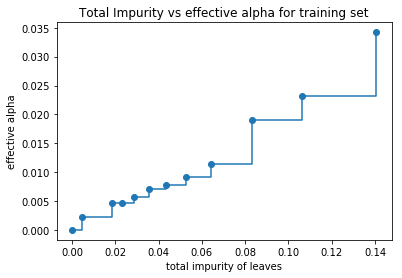

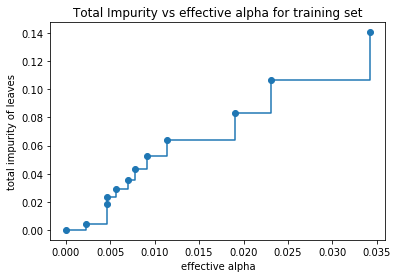

In [150]:
fig, ax = plt.subplots()
ax.plot(impurities[:-1], ccp_alphas[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("total impurity of leaves")
ax.set_ylabel("effective alpha")
ax.set_title("Total Impurity vs effective alpha for training set")

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [151]:
def add_to_list(list_a,new_item):
    list_a.append(new_item)

In [152]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    #print(clf)
    add_to_list(clfs,clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3272984419327777


In [153]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depths = [clf.tree_.max_depth for clf in clfs]

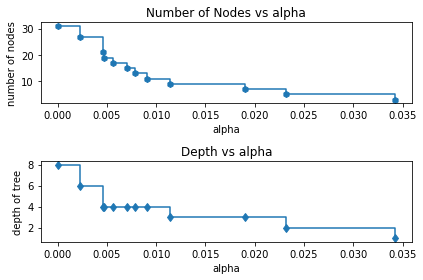

In [154]:
fig, ax = plt.subplots(2,1)
#Generate two plots, number of nodes , depth vs alpha
#First plot
ax[0].plot(ccp_alphas, node_counts, marker='h', drawstyle='steps-post')
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of Nodes vs alpha")
#Second plot
ax[1].plot(ccp_alphas, depths, marker='d', drawstyle='steps-post')
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [155]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
score_list_index = range(len(train_scores))

accuracy_gaps = []
for i in score_list_index:
    accuracy_gap = train_scores[i] - test_scores[i]
    accuracy_gaps.append(accuracy_gap)
    
#wont be ploted
accuracy_ratios = []
for i in score_list_index:
    accuracy_ratio = train_scores[i] / test_scores[i]
    accuracy_ratios.append(accuracy_ratio)

In [156]:
# Creating data frame from list for easier access
dataframe_data = [ccp_alphas, train_scores, test_scores, accuracy_gaps, accuracy_ratios]
scoring_columns = ["ccp_alphas","train_scores", "test_scores", "accuracy_gaps", "accuracy_ratios"]
df1 = pd.DataFrame(data = dataframe_data)
df2 = df1.T
df2.columns = scoring_columns
df2

,ccp_alphas,train_scores,test_scores,accuracy_gaps,accuracy_ratios
0,0.000000,1.000000,0.881119,0.118881,1.134921
1,0.002266,0.997653,0.888112,0.109541,1.123341
2,0.004647,0.990610,0.916084,0.074526,1.081353
3,0.004660,0.988263,0.916084,0.072179,1.078791
4,0.005634,0.983568,0.916084,0.067484,1.073666
5,0.007042,0.978873,0.923077,0.055796,1.060446
6,0.007842,0.976526,0.930070,0.046456,1.049949
7,0.009114,0.971831,0.930070,0.041761,1.044901
8,0.011444,0.964789,0.937063,0.027726,1.029588
9,0.018988,0.955399,0.916084,0.039315,1.042917


### Select minimum alpha as best alpha

In [157]:
#defining variables for print output
best_alpha_index = test_scores.index(max(test_scores))
best_alpha = df2['ccp_alphas'][best_alpha_index]
best_alpha_test_score = df2['test_scores'][best_alpha_index]
best_alpha_accuracy_gap = df2['accuracy_gaps'][best_alpha_index]
best_alpha_accuracy_ratio = df2['accuracy_ratios'][best_alpha_index]

In [158]:
#best_alpha_index = test_scores.index(max(test_scores))
#best_alpha = ccp_alphas[best_alpha_index]
#best_alpha_test_score = test_scores[best_alpha_index]
#best_alpha_accuracy_gap = accuracy_gaps[best_alpha_index]
#best_alpha_accuracy_ratio = accuracy_ratios[best_alpha_index]

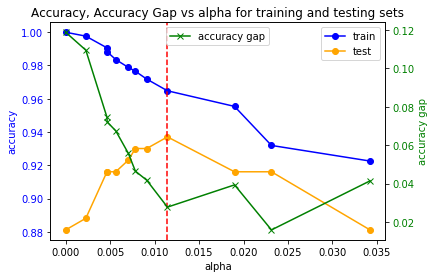

In [159]:
#Accuracy double plot
fig, ax1 = plt.subplots()

ax1.set_xlabel('alpha')
ax1.set_ylabel('accuracy', color='blue')
ax1.set_title("Accuracy, Accuracy Gap vs alpha for training and testing sets")
ax1.plot(ccp_alphas, train_scores, marker='o', label='train', color='blue')
ax1.plot(ccp_alphas, test_scores, marker='o', label='test', color='orange')
plt.axvline(x=ccp_alphas[best_alpha_index], linestyle='--', color='red')
ax1.legend()
#fig.text(text='This is the figure title', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()

ax2.set_ylabel('accuracy gap', color='green')
ax2.plot(ccp_alphas, accuracy_gaps, marker='x', label='accuracy gap',  color='green')
ax2.legend(loc='upper center')
ax2.tick_params(axis='y', labelcolor='green')


## Selected Tree Information

In [160]:
best_x, best_y, best_g, best_r = str(best_alpha), str(best_alpha_test_score), str(best_alpha_accuracy_gap), str(best_alpha_accuracy_ratio)

underline_key("Best alpha:", best_x)
underline_key("Best alpha's test score", best_y)
underline_key("Best alpha's accuracy gap:", best_g)
underline_key("Best alpha's accuracy ratio:", best_r)

Best alpha: 0.011443661971830986
Best alpha's test score 0.9370629370629371
Best alpha's accuracy gap: 0.02772579533142916
Best alpha's accuracy ratio: 1.0295879756148834


A training accuracy that is subjectively far higher than test accuracy indicates over-fitting. - Andrew Ng

In [161]:
underline_key("Selected Decision Tree Parameters", str(clfs[best_alpha_index]))       

Selected Decision Tree Parameters DecisionTreeClassifier(ccp_alpha=0.011443661971830986, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')


In [174]:
underline_key("Selected Decision Tree Structure","")
from sklearn.tree import export_text





#SET PARAMETERS!!!!! FEATURE NAMES, CLASS NAMES
feature_names = list(df_data.columns.values[3:])
class_names = list(df_data.diagnosis_num.unique())
r = export_text(clfs[best_alpha_index], feature_names=feature_names, max_depth=100, spacing=3, show_weights='True')
print(r)

Selected Decision Tree Structure 
|--- concave_points_mean <= 0.05
|   |--- area_worst <= 952.90
|   |   |--- weights: [7.00, 245.00] class: 1
|   |--- area_worst >  952.90
|   |   |--- weights: [6.00, 2.00] class: 0
|--- concave_points_mean >  0.05
|   |--- area_worst <= 785.80
|   |   |--- texture_worst <= 23.74
|   |   |   |--- weights: [0.00, 14.00] class: 1
|   |   |--- texture_worst >  23.74
|   |   |   |--- weights: [13.00, 3.00] class: 0
|   |--- area_worst >  785.80
|   |   |--- weights: [133.00, 3.00] class: 0



## Exporting
### plot tree method - straight to inline vizualization
https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
### .dot method - saved file that is called upon later to create vizualization
https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
### export text method - inline text
### export to png

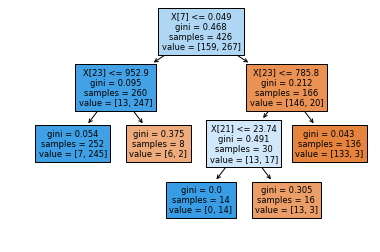

In [199]:
#version 1 from https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py
from sklearn.tree import plot_tree

plt.figure()
clf_selected = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alphas[best_alpha_index]).fit(X_train, y_train)

plot_tree(clf_selected, feature_names=None, filled=True,
          node_ids=False, rotate=False, rounded=False, fontsize=None)
plt.show()

#this version possible allows for the matrix of graph by the unique matplot axis parameter in DecisionTreeClassifier
#from 
#https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py

In [164]:

#from sklearn.tree import export_graphviz
#import graphviz
###LOOK AT PARAMETERS LATER
##just export tree to .dot file
##export_graphviz(clfs[best_alpha_index], out_file="mytree.dot")
##opening .dot file to be visualized in output
##with open("mytree.dot") as f:
#    dot_graph = f.read()
##graphviz.Source(dot_graph)
##g = graphviz.Source(dot_graph)
##g.view()
##graph.format = "png"
##graph.render("mytree.dot")
#graph = Source(tree.export_graphviz(best_alpha_index], out_file=None))
#png_bytes = graph.pipe(format='png')
#with open('dtree_pipe.png','wb') as f:
#    f.write(png_bytes)

#from IPython.display import Image
#Image(png_bytes)


In [165]:

##writes .dot file to png hopefully
#(graph,) = pydot.graph_from_dot_file('somefile.dot')
#graph.write_png('somefile.png')

#------------------------------------------------------

#graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
#Image(graph.create_png())

#------------------------------------
#graph.format = "png"
#graph.render("file_name")


In [166]:
#import pydotplus
#graph = pydotplus.graph_from_dot_data(mytree.dot.getvalue()) 
#Image(graph.create_png())

In [167]:
#X_ = iris.data
#XX_=X[:,[1,2]]
#print(X_)
#print(XX_)


In [122]:
ifnx = iris.feature_names[pair[0]]
print(ifnx)

petal length (cm)


In [ ]:
#what is the difference between 
#data[[n]]
#data[n][e]
#data[n[e]]
#data[:,[n,e]]


Automatically created module for IPython interactive environment


(0.0, 7.88, -0.9, 3.4800000000000044)

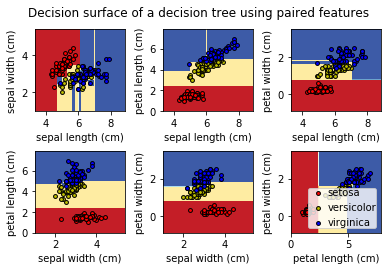

In [103]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

#this iterates pariidx as index? and pair as small list in the large list in reference to columns in dataset
#for future insert combonation of [x_column, y_column]
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # like said above, pair is used to select appropriate columns in dataset where : is selecting all rows
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)
    
    # Plot the decision boundary
    #plt.subplot(nrows, ncols, index)
    #pairidx is a index number from above to index small list out of large list
    plt.subplot(2, 3, pairidx + 1)

    # [:,] refers to the first out of two columns with all rows
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    #creates the granualarity of visual plot
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    # makes layout of visualization to have form factor
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    # ravel flattens array aka turn a list of lists into one continous list
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #generate background rectangles
        #X and Y must both be 2-D with the same shape as Z (e.g. created via numpy.meshgrid),
            #or they must both be 1-D such that len(X) == M 
            #is the number of columns in Z and len(Y) == N is the number of rows in Z.
            # Z is the height values over which the contour is drawn.
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

## look at me 
future project addon idea: iterate over decision_tree_clasifier parameters
print(clfs)


for help https://bobswift.atlassian.net/wiki/spaces/GVIZ/pages/131924165/Graphviz+installation